# Assignment 1 - Let the Tensors flow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd
os.chdir("/content/drive/My Drive/Colab Notebooks")


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

11490434/11490434 [==============================] - 0s 0us/step


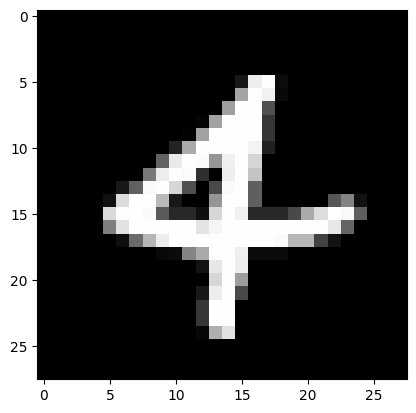

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# we can look at any of the images and the corresponding labels
# say, image no. 155
plt.imshow(train_images[150], cmap="Greys_r")
plt.show()

In [6]:
print(train_labels[150])

4


In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# images are "flattened" into vectors
data = MNISTDataset(train_images.reshape([-1, 28*28]), train_labels,
                    test_images.reshape([-1, 28*28]), test_labels,
                    batch_size=128)

# Linear Model

In [10]:
# define the linear model
# weight dimensions are completely determined by input/output dimensions
W = tf.Variable(np.zeros([28*28, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))

weights = [W, b]


def model(inputs):
    return tf.matmul(inputs, W) + b


def get_accuracy(labels, outputs):
    predictions = tf.argmax(outputs, axis=1, output_type=tf.int32)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))


# NOTE
# the ONLY thing that you should have to change for a working MLP is to
# - add more variables
# - adapt the model function (don't forget activation functions)
#   - activation functions can be found mainly in the tf.nn module,
#     e.g. tf.nn.relu
# - add the new variables in the gradient call/update below


# parameters for the training process
# this already offers potential for experimentation
# - how many steps do we actually need to reach acceptable performance?
# - what if we train for some absurd number of steps?
# - what happens if we increase/decrease the learning rate?
# - do learning rate and number of steps interact?
# - ...
train_steps = 2000
learning_rate = 0.1

In [11]:
# training loop
for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=label_batch))

    grads = tape.gradient(cross_entropy, weights)
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])

    # every so often we print loss/accuracy
    if not step % 100:
        accuracy = get_accuracy(label_batch, logits)
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, cross_entropy, accuracy))

        test_logits = model(data.test_data)
        test_accuracy = get_accuracy(data.test_labels, test_logits)
        print("Test accuracy: {}".format(test_accuracy))


Step 1. Batch loss: 2.3025851249694824 Batch accuracy: 0.0859375
Test accuracy: 0.5289000272750854
Step 101. Batch loss: 0.6217084527015686 Batch accuracy: 0.8828125
Test accuracy: 0.8671000003814697
Step 201. Batch loss: 0.46020641922950745 Batch accuracy: 0.90625
Test accuracy: 0.8853999972343445
Step 301. Batch loss: 0.4897739887237549 Batch accuracy: 0.8671875
Test accuracy: 0.8932999968528748
Step 401. Batch loss: 0.3351942300796509 Batch accuracy: 0.9140625
Test accuracy: 0.895799994468689
Starting new epoch...
Step 501. Batch loss: 0.2814432382583618 Batch accuracy: 0.953125
Test accuracy: 0.9024999737739563
Step 601. Batch loss: 0.30916324257850647 Batch accuracy: 0.9296875
Test accuracy: 0.9024999737739563
Step 701. Batch loss: 0.44094789028167725 Batch accuracy: 0.8984375
Test accuracy: 0.9059000015258789
Step 801. Batch loss: 0.41599494218826294 Batch accuracy: 0.90625
Test accuracy: 0.9068999886512756
Step 901. Batch loss: 0.4544479250907898 Batch accuracy: 0.8671875
Test a

In [12]:
test_predictions = tf.argmax(model(data.test_data), axis=1,
                       output_type=tf.int32)
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_predictions, data.test_labels),
                             tf.float32))
print("Test accuracy: {}".format(test_accuracy))


Test accuracy: 0.9175000190734863


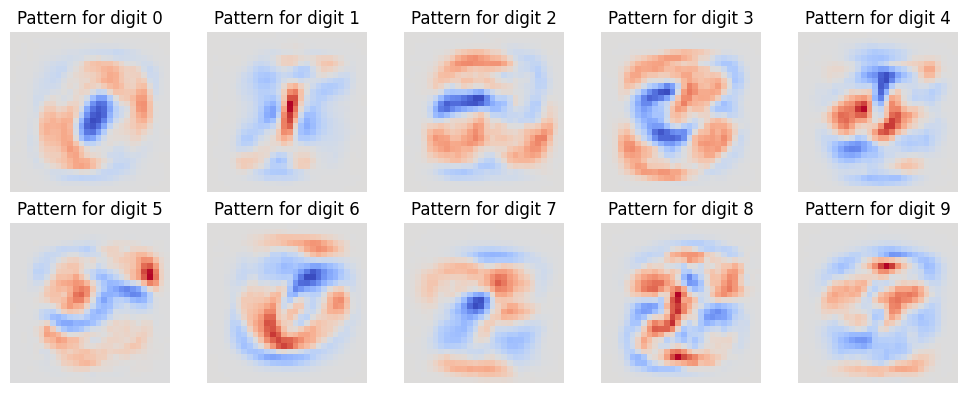

In [13]:
# some rudimentary visualization.
# in a  linear model, the weights basically learn one pattern per class.
# the patterns are compared to the input and the pattern with the highest matching score
# (dot product) "wins".
# we can plot the pattern learned for each class as an image.
# they don't always look as expected :)

plt.figure(figsize=(10, 4))
for ind, pattern in enumerate(W.numpy().T):
    pattern = pattern.reshape((28, 28))

    absmax = abs(pattern).max()
    plt.subplot(2, 5, ind+1)
    plt.imshow(pattern, vmin=-absmax, vmax=absmax, cmap="coolwarm")
    plt.axis("off")
    plt.title("Pattern for digit {}".format(ind))
plt.tight_layout()
plt.show()

# Adding a hidden layer

Weights and biases updated

In [14]:
data = MNISTDataset(train_images.reshape([-1, 28*28]), train_labels,
                    test_images.reshape([-1, 28*28]), test_labels,
                    batch_size=128)

In [25]:
def deepnn(nodes, weight_range, train_steps, learning_rate):
    w0 = tf.Variable(np.random.uniform(-weight_range, weight_range, [28*28,nodes]).astype(np.float32))
    b0 =  tf.Variable(np.zeros(nodes, dtype=np.float32))

    w1 = tf.Variable(np.random.uniform(-weight_range, weight_range, [nodes,10]).astype(np.float32))
    b1 =  tf.Variable(np.zeros(10, dtype=np.float32))

    W = [w0, w1]
    b = [b0, b1]

    def model(inputs):
        for wt, bs in zip(W, b):
          inputs = tf.nn.relu(tf.matmul(inputs, wt) + bs)

        return inputs

    def get_accuracy(labels, outputs):
        predictions = tf.argmax(outputs, axis=1, output_type=tf.int32)
        return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

    for step in range(train_steps+1):
        image_batch, label_batch = data.next_batch()

        with tf.GradientTape(persistent=True) as tape:
            logits = model(image_batch)
            cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=logits, labels=label_batch))

        for i in range(len(W)):
          grads = tape.gradient(cross_entropy, [W[i], b[i]])
          W[i].assign_sub(learning_rate * grads[0])
          b[i].assign_sub(learning_rate * grads[1])

        # every so often we print loss/accuracy
        if not step % 100:
            accuracy = get_accuracy(label_batch, logits)
            print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, cross_entropy, accuracy))

            test_logits = model(data.test_data)
            test_accuracy = get_accuracy(data.test_labels, test_logits)
            print("Test accuracy: {}".format(test_accuracy))

    return test_accuracy

In [16]:
train_steps = 2000
learning_rate = 0.1

In [26]:
deepnn(nodes = 256, weight_range = 0.1, train_steps = 2000, learning_rate = 0.1)

Step 1. Batch loss: 2.3324832916259766 Batch accuracy: 0.0703125
Test accuracy: 0.1517000049352646
Step 101. Batch loss: 0.7539874315261841 Batch accuracy: 0.8046875
Test accuracy: 0.7971000075340271
Step 201. Batch loss: 0.7018442749977112 Batch accuracy: 0.796875
Test accuracy: 0.8131999969482422
Starting new epoch...
Step 301. Batch loss: 0.6695454120635986 Batch accuracy: 0.7734375
Test accuracy: 0.8197000026702881
Step 401. Batch loss: 0.7122830152511597 Batch accuracy: 0.7890625
Test accuracy: 0.8292999863624573
Step 501. Batch loss: 0.5937312841415405 Batch accuracy: 0.8203125
Test accuracy: 0.8296999931335449
Step 601. Batch loss: 0.5256243944168091 Batch accuracy: 0.8359375
Test accuracy: 0.8360000252723694
Step 701. Batch loss: 0.46494409441947937 Batch accuracy: 0.8359375
Test accuracy: 0.8389000296592712
Starting new epoch...
Step 801. Batch loss: 0.5627955198287964 Batch accuracy: 0.8203125
Test accuracy: 0.839900016784668
Step 901. Batch loss: 0.517666220664978 Batch accu

<tf.Tensor: shape=(), dtype=float32, numpy=0.9523>

In [21]:
deepnn(nodes = 256, weight_range = 0.1, train_steps = 3000, learning_rate = 0.1)

Step 1. Batch loss: 2.288914680480957 Batch accuracy: 0.1015625
Test accuracy: 0.13189999759197235
Step 101. Batch loss: 0.5348054766654968 Batch accuracy: 0.8671875
Test accuracy: 0.8755999803543091
Step 201. Batch loss: 0.3951537013053894 Batch accuracy: 0.8671875
Test accuracy: 0.8949000239372253
Step 301. Batch loss: 0.3789404630661011 Batch accuracy: 0.890625
Test accuracy: 0.9067999720573425
Step 401. Batch loss: 0.3115314841270447 Batch accuracy: 0.90625
Test accuracy: 0.9161999821662903
Starting new epoch...
Step 501. Batch loss: 0.4372786283493042 Batch accuracy: 0.875
Test accuracy: 0.9207000136375427
Step 601. Batch loss: 0.29959994554519653 Batch accuracy: 0.921875
Test accuracy: 0.9279999732971191
Step 701. Batch loss: 0.34868547320365906 Batch accuracy: 0.9140625
Test accuracy: 0.9316999912261963
Step 801. Batch loss: 0.14728039503097534 Batch accuracy: 0.9609375
Test accuracy: 0.9308000206947327
Step 901. Batch loss: 0.31406843662261963 Batch accuracy: 0.9296875
Test acc

In [20]:
deepnn(nodes = 256, weight_range = 0.5, train_steps = 2000, learning_rate = 0.1)

Step 1. Batch loss: 7.4392266273498535 Batch accuracy: 0.1328125
Test accuracy: 0.14020000398159027
Starting new epoch...
Step 101. Batch loss: 1.975414752960205 Batch accuracy: 0.2890625
Test accuracy: 0.2797999978065491
Step 201. Batch loss: 1.6640715599060059 Batch accuracy: 0.484375
Test accuracy: 0.43470001220703125
Step 301. Batch loss: 1.6941440105438232 Batch accuracy: 0.53125
Test accuracy: 0.5489000082015991
Step 401. Batch loss: 1.2798532247543335 Batch accuracy: 0.578125
Test accuracy: 0.6122000217437744
Step 501. Batch loss: 1.1404573917388916 Batch accuracy: 0.671875
Test accuracy: 0.6319000124931335
Starting new epoch...
Step 601. Batch loss: 1.187378168106079 Batch accuracy: 0.6484375
Test accuracy: 0.6633999943733215
Step 701. Batch loss: 1.370940089225769 Batch accuracy: 0.734375
Test accuracy: 0.7016000151634216
Step 801. Batch loss: 0.7766975164413452 Batch accuracy: 0.8515625
Test accuracy: 0.8169000148773193
Step 901. Batch loss: 1.0642714500427246 Batch accuracy:

In [18]:
deepnn(nodes = 128, weight_range = 0.1, train_steps = 2000, learning_rate = 0.1)

Step 1. Batch loss: 2.327716112136841 Batch accuracy: 0.03125
Test accuracy: 0.08749999850988388
Step 101. Batch loss: 1.232053518295288 Batch accuracy: 0.6171875
Test accuracy: 0.6883000135421753
Step 201. Batch loss: 1.013066053390503 Batch accuracy: 0.6796875
Test accuracy: 0.7142999768257141
Step 301. Batch loss: 0.800326943397522 Batch accuracy: 0.703125
Test accuracy: 0.7221999764442444
Starting new epoch...
Step 401. Batch loss: 0.8638477325439453 Batch accuracy: 0.6875
Test accuracy: 0.7333999872207642
Step 501. Batch loss: 0.7992844581604004 Batch accuracy: 0.7109375
Test accuracy: 0.7355999946594238
Step 601. Batch loss: 0.6868355870246887 Batch accuracy: 0.765625
Test accuracy: 0.7372000217437744
Step 701. Batch loss: 0.8777542114257812 Batch accuracy: 0.640625
Test accuracy: 0.7408000230789185
Step 801. Batch loss: 0.6770921945571899 Batch accuracy: 0.75
Test accuracy: 0.7404999732971191
Starting new epoch...
Step 901. Batch loss: 0.8371627330780029 Batch accuracy: 0.71875


In [22]:
deepnn(nodes = 128, weight_range = 0.5, train_steps = 2000, learning_rate = 0.1)

Step 1. Batch loss: 7.162877559661865 Batch accuracy: 0.15625
Test accuracy: 0.11620000004768372
Step 101. Batch loss: 2.271188497543335 Batch accuracy: 0.171875
Test accuracy: 0.22789999842643738
Step 201. Batch loss: 1.6236417293548584 Batch accuracy: 0.421875
Test accuracy: 0.3637000024318695
Starting new epoch...
Step 301. Batch loss: 1.5185800790786743 Batch accuracy: 0.53125
Test accuracy: 0.5307000279426575
Step 401. Batch loss: 1.3317657709121704 Batch accuracy: 0.625
Test accuracy: 0.632099986076355
Step 501. Batch loss: 1.0102510452270508 Batch accuracy: 0.6953125
Test accuracy: 0.6604999899864197
Step 601. Batch loss: 0.9331879019737244 Batch accuracy: 0.6875
Test accuracy: 0.6769000291824341
Step 701. Batch loss: 1.1032533645629883 Batch accuracy: 0.671875
Test accuracy: 0.6862999796867371
Starting new epoch...
Step 801. Batch loss: 1.0616254806518555 Batch accuracy: 0.765625
Test accuracy: 0.6912999749183655
Step 901. Batch loss: 1.07259202003479 Batch accuracy: 0.640625
T

In [23]:
deepnn(nodes = 128, weight_range = 0.1, train_steps = 3000, learning_rate = 0.1)

Step 1. Batch loss: 2.3024072647094727 Batch accuracy: 0.140625
Test accuracy: 0.15119999647140503
Step 101. Batch loss: 1.2731670141220093 Batch accuracy: 0.609375
Test accuracy: 0.5950999855995178
Starting new epoch...
Step 201. Batch loss: 1.0032069683074951 Batch accuracy: 0.671875
Test accuracy: 0.6869999766349792
Step 301. Batch loss: 0.7388947010040283 Batch accuracy: 0.8046875
Test accuracy: 0.8044000267982483
Step 401. Batch loss: 0.7066687345504761 Batch accuracy: 0.75
Test accuracy: 0.8137999773025513
Step 501. Batch loss: 0.5850850343704224 Batch accuracy: 0.796875
Test accuracy: 0.8258000016212463
Starting new epoch...
Step 601. Batch loss: 0.5661432147026062 Batch accuracy: 0.796875
Test accuracy: 0.8306000232696533
Step 701. Batch loss: 0.4540446400642395 Batch accuracy: 0.8515625
Test accuracy: 0.8295999765396118
Step 801. Batch loss: 0.573180615901947 Batch accuracy: 0.7734375
Test accuracy: 0.8357999920845032
Step 901. Batch loss: 0.30933845043182373 Batch accuracy: 0

In [19]:
deepnn(nodes = 512, weight_range = 0.1, train_steps = 2000, learning_rate = 0.1)

Step 1. Batch loss: 2.3803436756134033 Batch accuracy: 0.0546875
Test accuracy: 0.11010000109672546
Step 101. Batch loss: 0.6375302672386169 Batch accuracy: 0.8359375
Test accuracy: 0.8037999868392944
Step 201. Batch loss: 0.6093590259552002 Batch accuracy: 0.8359375
Test accuracy: 0.8641999959945679
Starting new epoch...
Step 301. Batch loss: 0.5723909139633179 Batch accuracy: 0.8828125
Test accuracy: 0.8723000288009644
Step 401. Batch loss: 0.5451146364212036 Batch accuracy: 0.8984375
Test accuracy: 0.8985999822616577
Step 501. Batch loss: 0.5182484984397888 Batch accuracy: 0.9296875
Test accuracy: 0.9038000106811523
Step 601. Batch loss: 0.4330449402332306 Batch accuracy: 0.90625
Test accuracy: 0.9031999707221985
Starting new epoch...
Step 701. Batch loss: 0.437968909740448 Batch accuracy: 0.8828125
Test accuracy: 0.9106000065803528
Step 801. Batch loss: 0.5767238736152649 Batch accuracy: 0.90625
Test accuracy: 0.9214000105857849
Step 901. Batch loss: 0.5502599477767944 Batch accura

In [24]:
deepnn(nodes = 256, weight_range = 0.5, train_steps = 2000, learning_rate = 0.1)

Step 1. Batch loss: 6.81820011138916 Batch accuracy: 0.09375
Test accuracy: 0.1388999968767166
Step 101. Batch loss: 2.122997283935547 Batch accuracy: 0.125
Test accuracy: 0.13429999351501465
Step 201. Batch loss: 2.0261688232421875 Batch accuracy: 0.140625
Test accuracy: 0.14980000257492065
Step 301. Batch loss: 1.9784693717956543 Batch accuracy: 0.171875
Test accuracy: 0.16019999980926514
Step 401. Batch loss: 1.9379498958587646 Batch accuracy: 0.1796875
Test accuracy: 0.20059999823570251
Starting new epoch...
Step 501. Batch loss: 1.7292367219924927 Batch accuracy: 0.3046875
Test accuracy: 0.2890999913215637
Step 601. Batch loss: 1.5662492513656616 Batch accuracy: 0.359375
Test accuracy: 0.3102000057697296
Step 701. Batch loss: 1.5194543600082397 Batch accuracy: 0.3671875
Test accuracy: 0.32280001044273376
Step 801. Batch loss: 1.5783369541168213 Batch accuracy: 0.359375
Test accuracy: 0.3781999945640564
Starting new epoch...
Step 901. Batch loss: 1.5218944549560547 Batch accuracy: 

Step 1. Batch loss: 2.2898104190826416 Batch accuracy: 0.1328125
Test accuracy: 0.1437000036239624
Step 101. Batch loss: 0.7844666242599487 Batch accuracy: 0.78125
Test accuracy: 0.7807000279426575
Step 201. Batch loss: 0.6707316637039185 Batch accuracy: 0.8046875
Test accuracy: 0.8015999794006348
Step 301. Batch loss: 0.7358328700065613 Batch accuracy: 0.7578125
Test accuracy: 0.8198000192642212
Starting new epoch...
Step 401. Batch loss: 0.5800930857658386 Batch accuracy: 0.8125
Test accuracy: 0.8245000243186951
Step 501. Batch loss: 0.5633695125579834 Batch accuracy: 0.8125
Test accuracy: 0.8309999704360962
Step 601. Batch loss: 0.4157162308692932 Batch accuracy: 0.8515625
Test accuracy: 0.8331000208854675
Step 701. Batch loss: 0.5024394989013672 Batch accuracy: 0.84375
Test accuracy: 0.8371999859809875
Step 801. Batch loss: 0.37625181674957275 Batch accuracy: 0.859375
Test accuracy: 0.8353000283241272
Starting new epoch...
Step 901. Batch loss: 0.5677984952926636 Batch accuracy: 0.

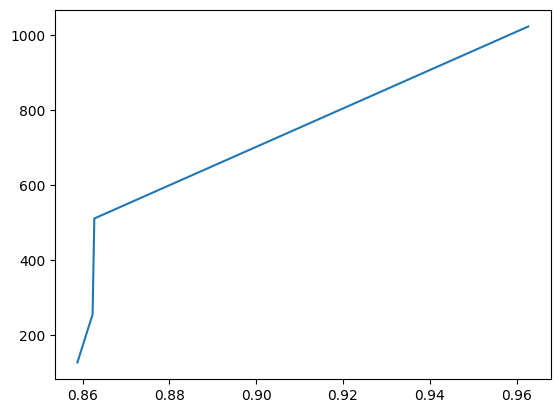

In [28]:
acc = []
node_nr = [128,256,512,1024]
for node in node_nr:
    acc.append(deepnn(nodes = node, weight_range = 0.1, train_steps = 2000, learning_rate = 0.1))
plt.plot(acc,node_nr)

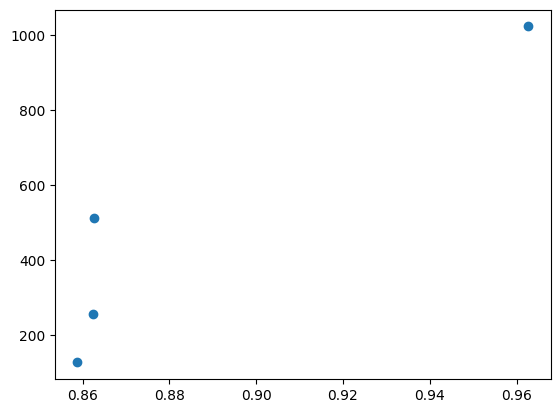

In [29]:
plt.scatter(acc,node_nr)